In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [193]:
first_ds = "first_output.csv" # millis 0 = 25/04/2025 00:56
second_ds = "second_output.csv" # millis 0 = 25/04/2025 19:57
third_ds = "third_output.csv" # millis 0 = 27/04/2025 20:00
fourth_ds = "fourth_output.csv" # millis 0 = 29/04/2025 17:00
fifth_ds = "fifth_output.csv" # millis 0 = 30/04/2025 17:45
sixth_ds = "sixth_output.csv" # millis 0 = 12/05/2025 23:20

In [194]:
first_df = pd.read_csv(first_ds)
second_df = pd.read_csv(second_ds)
third_df = pd.read_csv(third_ds)
fourth_df = pd.read_csv(fourth_ds)
fifth_df = pd.read_csv(fifth_ds)
sixth_df = pd.read_csv(sixth_ds)

In [195]:
first_df

,time_ms,soil,light,temp_c
0,3636,1406,1770,21.2
1,240778,1470,960,21.2
2,1140872,1530,844,21.0
3,2041008,1525,959,21.0
4,2941831,1668,895,21.0
...,...,...,...,...
70,62342854,1528,1033,23.8
71,63240824,1630,833,23.7
72,64140824,1533,963,23.6
73,65040049,1580,798,23.7


In [196]:
third_df

,time_ms,soil,light,temp_c
0,900679,1505,1819,23.3
1,1800719,1467,1766,23.3
2,2700759,1535,1226,23.4
3,3600855,1554,1985,23.4
4,4500895,1459,2013,23.4
...,...,...,...,...
174,157508996,1575,4095,22.1
175,158409092,1595,4095,22.1
176,159309132,1584,4095,22.2
177,160209173,1707,4095,22.0


In [197]:
first_start_time = pd.Timestamp("2025-04-25 00:56:00")

second_start_time = pd.Timestamp("2025-04-25 19:57:00")

third_start_time = pd.Timestamp("2025-04-27 20:00:00")

fourth_start_time = pd.Timestamp("2025-04-29 17:00:00")

fifth_start_time = pd.Timestamp("2025-04-30 17:45:00")

sixth_start_time = pd.Timestamp("2025-05-12 23:20:00")

first_df["timestamp"] = first_start_time + pd.to_timedelta(first_df["time_ms"], unit="ms")

second_df["timestamp"] = second_start_time + pd.to_timedelta(second_df["time_ms"], unit="ms")

third_df["timestamp"] = third_start_time + pd.to_timedelta(third_df["time_ms"], unit="ms")

fourth_df["timestamp"] = fourth_start_time + pd.to_timedelta(fourth_df["time_ms"], unit="ms")

fifth_df["timestamp"] = fifth_start_time + pd.to_timedelta(fifth_df["time_ms"], unit="ms")

sixth_df["timestamp"] = sixth_start_time + pd.to_timedelta(sixth_df["time_ms"], unit="ms")

df = pd.concat([first_df, second_df, third_df, fourth_df, fifth_df, sixth_df], axis=0)

df= df[["timestamp", "soil", "light", "temp_c"]]

df = df.sort_values("timestamp")
df

,timestamp,soil,light,temp_c
0,2025-04-25 00:56:03.636,1406,1770,21.2
1,2025-04-25 01:00:00.778,1470,960,21.2
2,2025-04-25 01:15:00.872,1530,844,21.0
3,2025-04-25 01:30:01.008,1525,959,21.0
4,2025-04-25 01:45:01.831,1668,895,21.0
...,...,...,...,...
1221,2025-05-25 16:51:36.079,4095,4095,20.8
1222,2025-05-25 17:06:36.149,4095,4095,20.0
1223,2025-05-25 17:21:36.219,4095,4095,20.1
1224,2025-05-25 17:36:36.289,4095,3442,20.5


In [198]:
df.isna()

,timestamp,soil,light,temp_c
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1221,False,False,False,False
1222,False,False,False,False
1223,False,False,False,False
1224,False,False,False,False


In [199]:
targets = ("Marchita", "Necesita riego", "Saludable", "Ahogada")

In [200]:
df["target"] = None
df

,timestamp,soil,light,temp_c,target
0,2025-04-25 00:56:03.636,1406,1770,21.2,None
1,2025-04-25 01:00:00.778,1470,960,21.2,None
2,2025-04-25 01:15:00.872,1530,844,21.0,None
3,2025-04-25 01:30:01.008,1525,959,21.0,None
4,2025-04-25 01:45:01.831,1668,895,21.0,None
...,...,...,...,...,...
1221,2025-05-25 16:51:36.079,4095,4095,20.8,None
1222,2025-05-25 17:06:36.149,4095,4095,20.0,None
1223,2025-05-25 17:21:36.219,4095,4095,20.1,None
1224,2025-05-25 17:36:36.289,4095,3442,20.5,None


In [201]:
def assign_target(df, start_timestamp, end_timestamp, label):
    start = pd.to_datetime(start_timestamp)
    end = pd.to_datetime(end_timestamp)


    def set_label(row):
        if start <= pd.to_datetime(row["timestamp"]) < end:
            return label
        return row["target"]

    df["target"] = df.apply(set_label, axis=1)


assign_target(df, "2025-04-25 00:56:00", "2025-04-26 09:00:00", "Saludable")
assign_target(df, "2025-04-26 09:00:00", "2025-04-27 09:00:00", "Necesita riego")
assign_target(df, "2025-04-27 09:00:00", "2025-05-01 09:00:00", "Marchita")
assign_target(df, "2025-05-01 09:00:00", "2025-05-08 09:00:00","Necesita riego")
assign_target(df,"2025-05-08 09:00:00", "2025-05-26 00:00:00", "Saludable")



In [202]:
df = df.reset_index(drop=True)

In [203]:
df.describe()

,timestamp,soil,light,temp_c
count,2791,2791.000000,2791.000000,2791.000000
mean,2025-05-10 08:55:18.834652416,3370.068076,2338.621641,21.257936
min,2025-04-25 00:56:03.636000,913.000000,745.000000,16.300000
25%,2025-05-02 11:22:38.683500032,2034.000000,1008.000000,20.350000
50%,2025-05-09 17:45:46.324999936,4095.000000,1497.000000,21.300000
75%,2025-05-18 11:28:11.824999936,4095.000000,4095.000000,22.400000
max,2025-05-25 17:51:36.359000,4095.000000,4095.000000,24.700000
std,NaN,1073.269515,1409.886647,1.389730


In [204]:
rows_with_none = df[df["target"].isna()]
rows_with_none

,timestamp,soil,light,temp_c,target


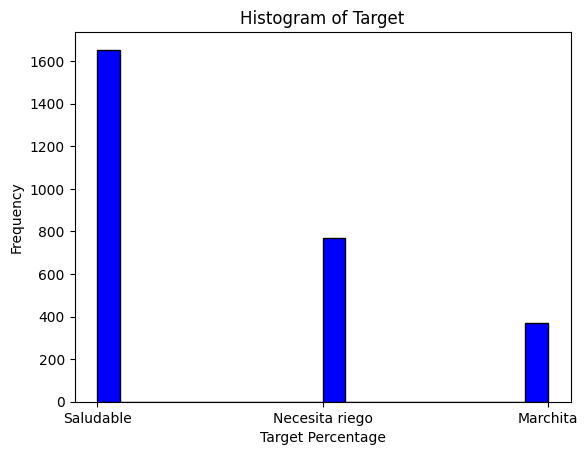

In [205]:
plt.hist(df['target'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Target')
plt.xlabel('Target Percentage')
plt.ylabel('Frequency')
plt.show()

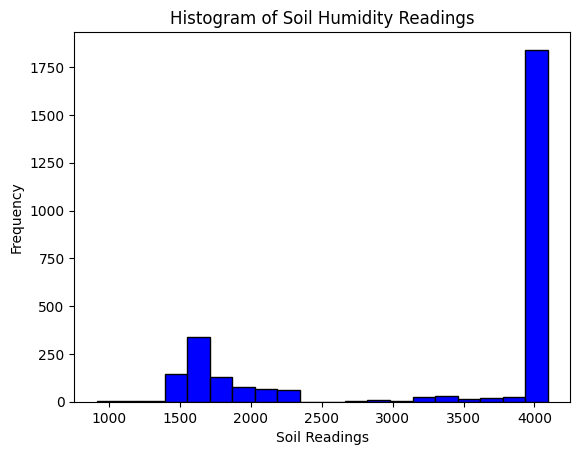

In [206]:

plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Humidity Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

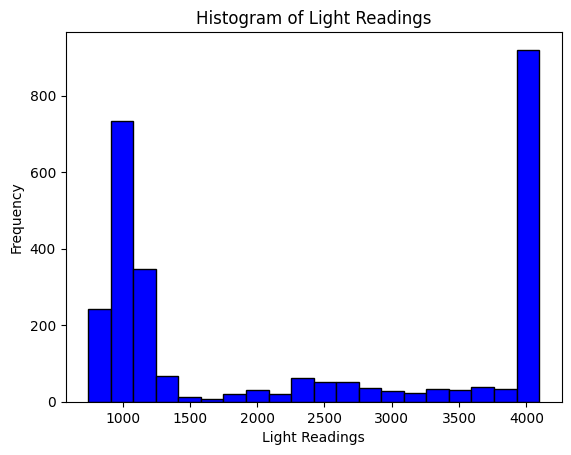

In [207]:
plt.hist(df["light"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Light Readings')
plt.xlabel('Light Readings')
plt.ylabel('Frequency')
plt.show()

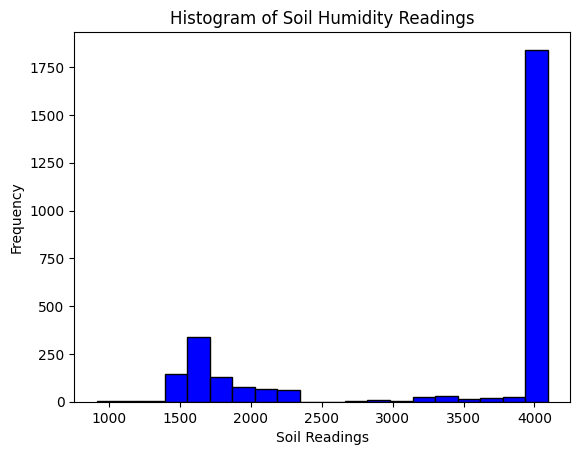

In [208]:
plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Humidity Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

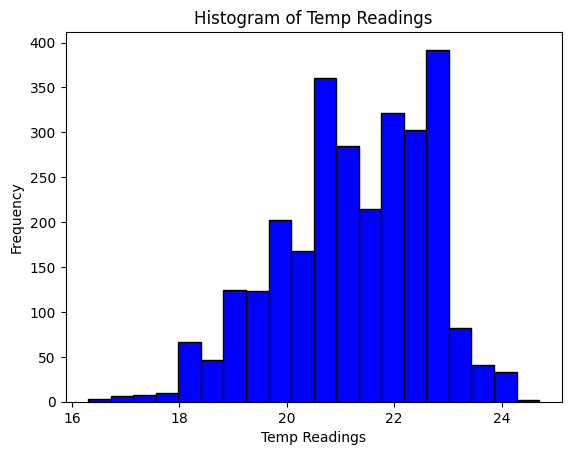

In [209]:
plt.hist(df["temp_c"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Temp Readings')
plt.xlabel('Temp Readings')
plt.ylabel('Frequency')
plt.show()

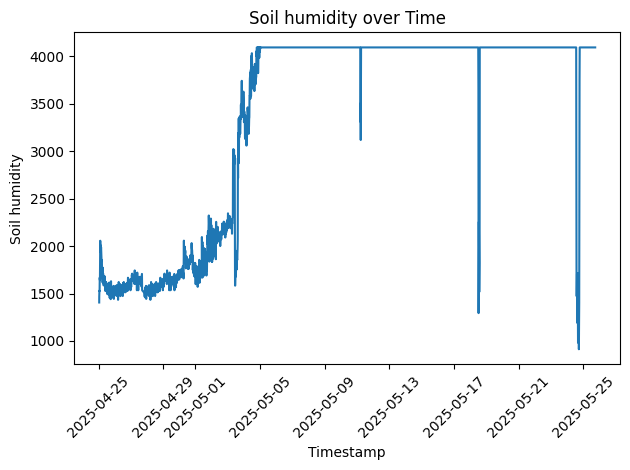

In [210]:
plt.plot(df['timestamp'], df['soil'])
plt.xlabel('Timestamp')
plt.ylabel('Soil humidity')
plt.title('Soil humidity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

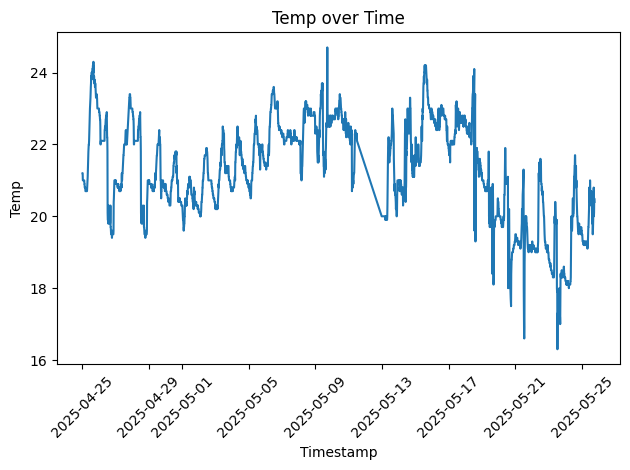

In [211]:
plt.show()
plt.plot(df['timestamp'], df['temp_c'])
plt.xlabel('Timestamp')
plt.ylabel('Temp')
plt.title('Temp over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

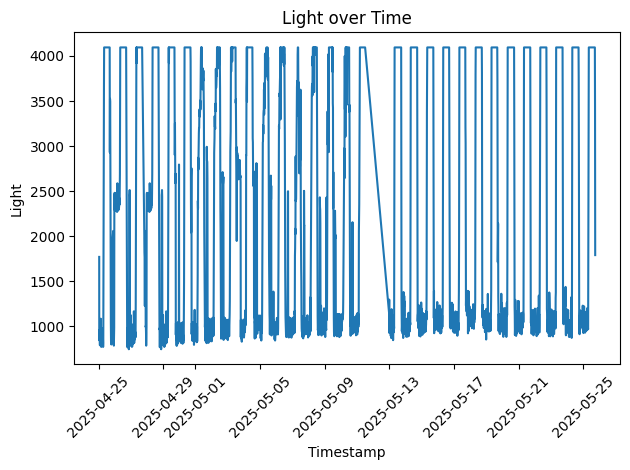

In [212]:
plt.show()
plt.show()

plt.plot(df['timestamp'], df['light'])
plt.xlabel('Timestamp')
plt.ylabel('Light')
plt.title('Light over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
def map_targets_to_numbers(df):
    mapping = {
        "muerta": 5,
        "marchita": 4,
        "necesita riego": 3,
        "saludable": 2,
        "ahogada": 1
    }
    df["target_num"] = df["target"].str.lower().map(mapping)
map_targets_to_numbers(df)
df

,timestamp,soil,light,temp_c,target,target_num
0,2025-04-25 00:56:03.636,1406,1770,21.2,Saludable,2
1,2025-04-25 01:00:00.778,1470,960,21.2,Saludable,2
2,2025-04-25 01:15:00.872,1530,844,21.0,Saludable,2
3,2025-04-25 01:30:01.008,1525,959,21.0,Saludable,2
4,2025-04-25 01:45:01.831,1668,895,21.0,Saludable,2
...,...,...,...,...,...,...
2786,2025-05-25 16:51:36.079,4095,4095,20.8,Saludable,2
2787,2025-05-25 17:06:36.149,4095,4095,20.0,Saludable,2
2788,2025-05-25 17:21:36.219,4095,4095,20.1,Saludable,2
2789,2025-05-25 17:36:36.289,4095,3442,20.5,Saludable,2


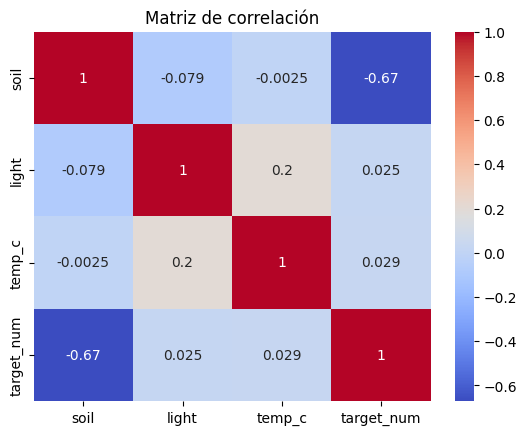

In [214]:
correlation = df[["soil","light","temp_c","target_num"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()



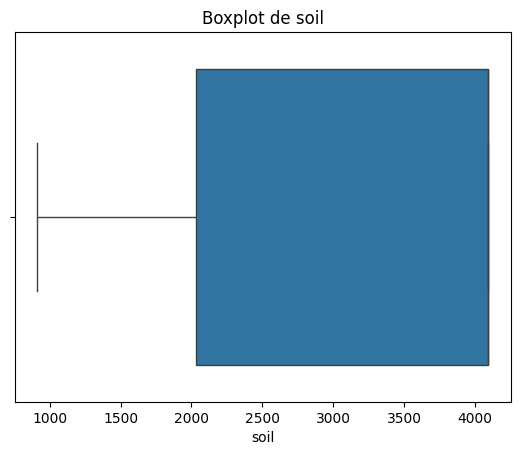

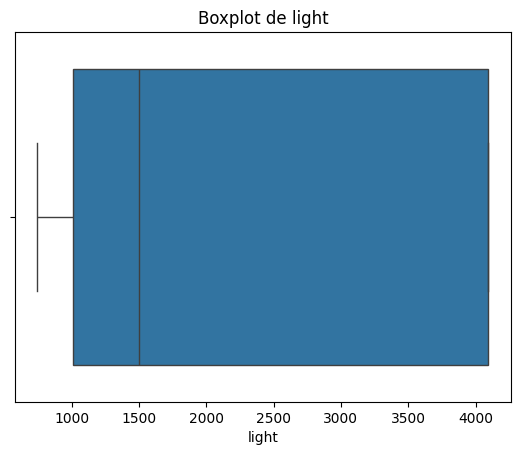

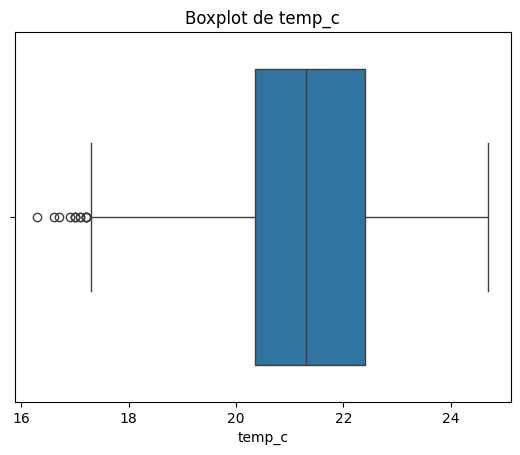

In [215]:
for col in ['soil', 'light', 'temp_c']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


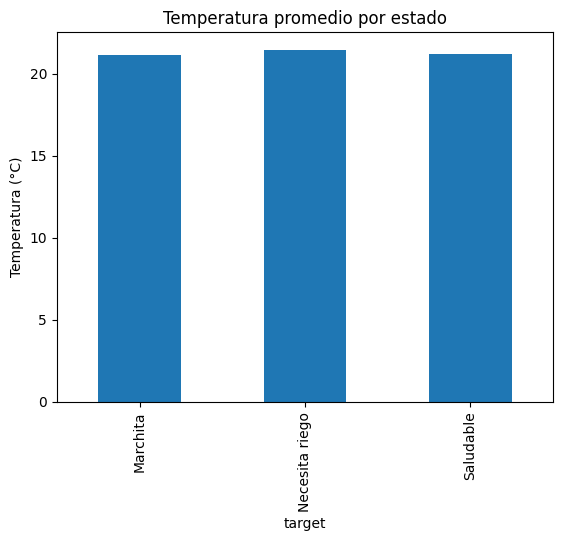

In [216]:
df.groupby('target')['temp_c'].mean().plot(kind='bar')
plt.title('Temperatura promedio por estado')
plt.ylabel('Temperatura (°C)')
plt.show()


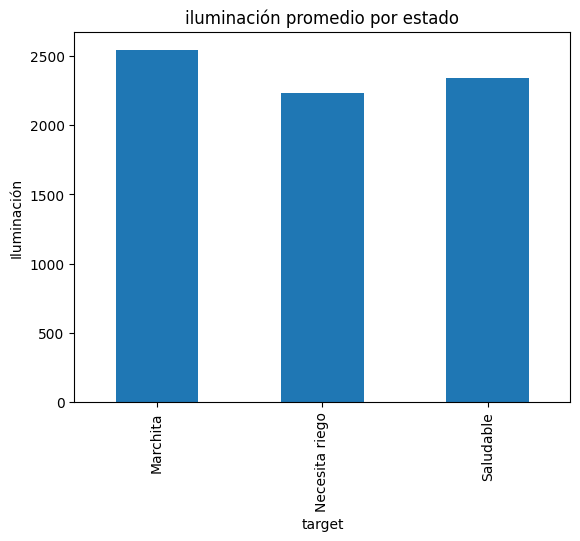

In [217]:
df.groupby('target')['light'].mean().plot(kind='bar')
plt.title('iluminación promedio por estado')
plt.ylabel('Iluminación')
plt.show()

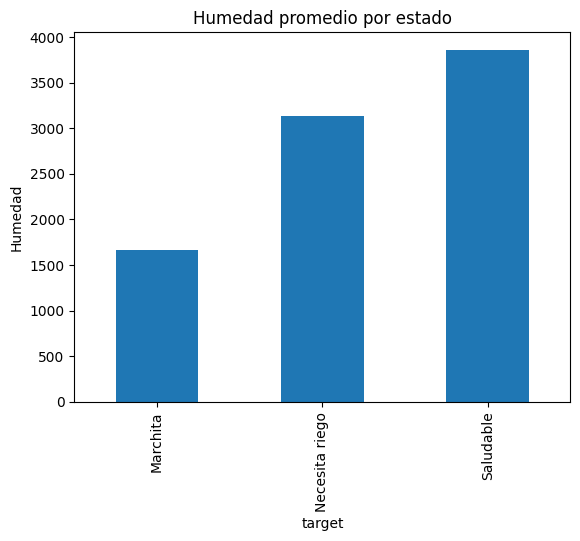

In [218]:
df.groupby('target')['soil'].mean().plot(kind='bar')
plt.title('Humedad promedio por estado')
plt.ylabel('Humedad')
plt.show()

Conclusiones

El dataset refleja una sola tendencia de cambio de estado, únicamente sensamos datos días después de un riego, entonces siempre el estado de la planta en términos de riego fue peor al anterior en el tiempo. Faltaría complementar el mismo con datos de la tendencia contraria (desde ahogada hasta recientemente regada).

La humedad en los 3 estados analizados en promedio presenta valores similares, creemos que esto se debe a que la humedad inicial era un valor cercano a la humedad mínima, por ende prácticamente no ha decrecido en el tiempo, manteniendose baja.

La luz refleja perfectamente la realidad ambiental cada vez que fue sensada. El comportamiento de la temperatura es similar al de la luz. Creemos que esto explica la correlación positiva (0.32) entre ellas. Creemos que tiene sentido ya que al aumentar la luz solar aumenta también la temperatura. Al ver los gráficos de las variables respecto al tiempo notamos que la luz crece drásticamente mientras que la temperatura crece a un ritmo relativamente más líneal en comparación a la anterior. Por este motivo creemos que el valor de la correlación que refleja la matriz es mucho menor al que realmente tienen estas variables.



### Modelos

#### Transformaciones

In [ ]:
prev_df = df.copy()

In [ ]:
prev_df

,timestamp,soil,light,temp_c,target,target_num
0,2025-04-25 00:56:03.636,1406,1770,21.2,Saludable,2
1,2025-04-25 01:00:00.778,1470,960,21.2,Saludable,2
2,2025-04-25 01:15:00.872,1530,844,21.0,Saludable,2
3,2025-04-25 01:30:01.008,1525,959,21.0,Saludable,2
4,2025-04-25 01:45:01.831,1668,895,21.0,Saludable,2
...,...,...,...,...,...,...
2786,2025-05-25 16:51:36.079,4095,4095,20.8,Saludable,2
2787,2025-05-25 17:06:36.149,4095,4095,20.0,Saludable,2
2788,2025-05-25 17:21:36.219,4095,4095,20.1,Saludable,2
2789,2025-05-25 17:36:36.289,4095,3442,20.5,Saludable,2


In [ ]:
df = prev_df

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler



Ya se transformó target en target_num, por lo que será droppeado el valor original.

In [ ]:
df.drop(columns=["target"], inplace=True)
df = df.rename(columns={"target_num": "target"})


Tenemos que transformar timestamp en un valor utilizable por los modelos.Decidimos quedarnos solo con el valor de la hora, ya que la fecha no aporta.


In [ ]:
df["hour"] = df["timestamp"].dt.hour

normalized_hour = df["hour"] / 24

df["hour_sin"] = np.sin(2*np.pi * normalized_hour)
df["hour_cos"] = np.cos(2*np.pi * normalized_hour)
df.drop(columns=["hour", "timestamp"], inplace=True)


También vamos a normalizar los datos para que features con escalas mas grandes no tengan mayor impacto que otros.

In [ ]:
scaler = MinMaxScaler()
df[["soil", "light", "temp_c"]] = scaler.fit_transform(df[["soil", "light", "temp_c"]])

In [ ]:
df = df[["soil", "light", "temp_c", "hour_sin", "hour_cos", "target"]]
df

,soil,light,temp_c,hour_sin,hour_cos,target
0,0.154934,0.305970,0.583333,0.000000,1.000000,2
1,0.175047,0.064179,0.583333,0.258819,0.965926,2
2,0.193903,0.029552,0.559524,0.258819,0.965926,2
3,0.192332,0.063881,0.559524,0.258819,0.965926,2
4,0.237272,0.044776,0.559524,0.258819,0.965926,2
...,...,...,...,...,...,...
2786,1.000000,1.000000,0.535714,-0.866025,-0.500000,2
2787,1.000000,1.000000,0.440476,-0.965926,-0.258819,2
2788,1.000000,1.000000,0.452381,-0.965926,-0.258819,2
2789,1.000000,0.805075,0.500000,-0.965926,-0.258819,2


#### Crear Train-Test split

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### Regresión logística

Accuracy: 0.7316636851520573
Precision: 0.7158976637208113
Recall: 0.7316636851520573


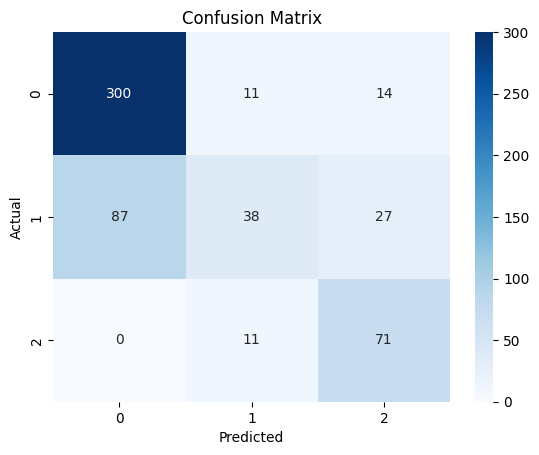

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.27142857 0.69175627 0.88530466 0.87455197 0.67383513 0.63799283
 0.65232975 0.59498208 0.60573477 0.65591398]
Mean CV accuracy: 0.6543830005120328


Llama la atención que las métricas globales de accuracy, recall y precision son muy similares entre sí, a pesar de que el dataset está desbalanceado. Esto podría indicar que el modelo está sesgado hacia la clase mayoritaria.

Por otro lado, se puede observar una alta variabilidad en los resultados entre los distintos folds de la validación cruzada, lo que indica que el modelo tiene una varianza elevada. Esto sugiere que es sensible a los datos de entrenamiento y podría estar sobreajustando.

#### Naive Bayes

Accuracy: 0.7656529516994633
Precision: 0.8081499983228028
Recall: 0.7656529516994633


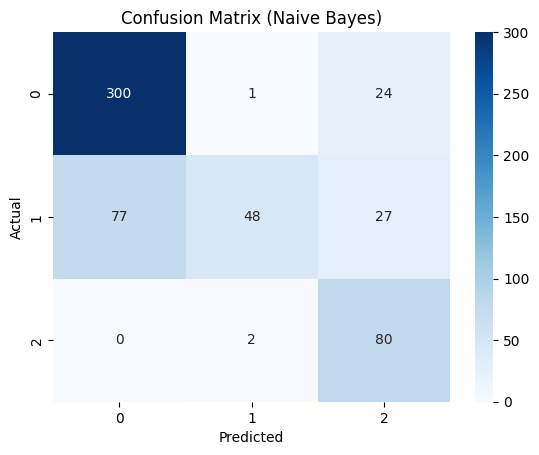

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

In [ ]:
cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.27142857 0.69175627 0.88530466 0.87455197 0.67383513 0.63799283
 0.65232975 0.59498208 0.60573477 0.65591398]
Mean CV accuracy: 0.6543830005120328


Aunque el modelo presenta una accuracy general del 76.6%, y una precision ponderada del 80.8%, estas métricas globales deben interpretarse con cautela debido al desequilibrio de clases. El hecho de que la precision sea mayor al recall indica que el modelo tiende a ser conservador al hacer predicciones, prefiriendo no cometer falsos positivos. Sin embargo, se puede observar en la matriz, que esta siendo demasiado conservador al predecir el 1, prefiriendo optar por 0, probablemente causado por el desbalance de clases del target.

Se puede observar la misma alta varianza.

#### Random Forest

Accuracy: 0.8336314847942755
Precision: 0.8343590869316245
Recall: 0.8336314847942755


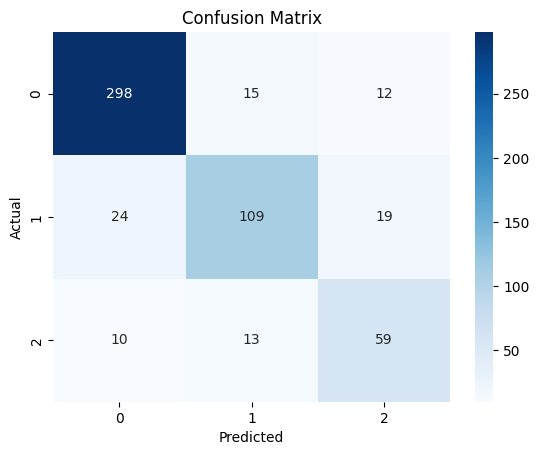

In [ ]:

rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cv_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.24642857 0.44086022 0.70967742 0.75268817 0.83154122 0.76702509
 0.82078853 0.70609319 0.74551971 0.74910394]
Mean CV accuracy: 0.6769726062467998


Se puede observar la misma alta varianza, pero tiene un valor promedio de Accuracy un poco mas alto que los modelos anteriores.

Por otro lado, este modelo tiene métricas mucho mejores en los 3 campos, Accuracy, Precision y Recall. Podemos ver cómo corrije el gran problema de los modelos anteriores, que eran incapaces de distinguir correctamente a los valores 1.



Sabemos que los targets estan ordenados, ya que "marchita" esta más cerca de "necesita riego" que de "saludable" y "ahogado", por lo que podemos intentar utilizar un modelo de regresión y en base al resultado luego clasificarlo

Accuracy: 0.7638640429338104
Precision: 0.6872316164637813
Recall: 0.7638640429338104


/home/saguirregaray1/Projects/ia/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


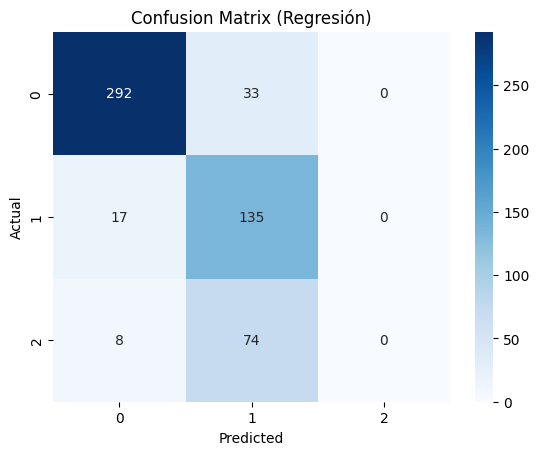

MSE: 0.18398735471099595
R2: 0.6587249941385298


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
# Redondear y limitar a los valores posibles de target
possible_targets = [0,1,2,3]
y_pred_reg_class = np.clip(np.round(y_pred), min(possible_targets), max(possible_targets)).astype(int)

# Evaluar desempeño como clasificación
print("Accuracy:", accuracy_score(y_test, y_pred_reg_class))
print("Precision:", precision_score(y_test, y_pred_reg_class, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_reg_class, average='weighted'))

cm = confusion_matrix(y_test, y_pred_reg_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Regresión)')
plt.show()

# Evaluar desempeño como regresión
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

La idea no funcionó. No predijo el valor 2 ("marchito") nunca.

### Mover el modelo al ESP32.

Para poder mover el mejor modelo, en nuestro caso RandomForestClassifier al ESP, primero debemos ajustarle algunos parámetros para que la inferencia no sea tan costosa.

In [ ]:
rf = RandomForestClassifier(random_state=7, n_estimators=30, max_depth=10, min_samples_leaf=5, max_features='sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Luego, utiliaremos la librería m2cgen para crear el código C automáticamente.

In [ ]:
import m2cgen as m2c

code = m2c.export_to_c(rf)
with open("rf.c", "w") as f:
    f.write(code)
